In [1]:
import numpy as np
import pandas as pd

In [2]:
!pwd

/Users/jamesreno/Documents/Documents - James’s MacBook Air/NYCDSA/Python/Python Project/Meetup_Data


In [3]:
rsvps = pd.read_csv('rsvps.csv')
meta_members = pd.read_csv('meta-members.csv')
meta_groups = pd.read_csv('meta-groups.csv')
meta_events = pd.read_csv('meta-events.csv')
m_to_g_edges = pd.read_csv('member-to-group-edges.csv')
member_edges = pd.read_csv('member-edges.csv')
group_edges = pd.read_csv('group-edges.csv')

Data Organization
Below are the data sets retrieved from: https://www.kaggle.com/datasets/stkbailey/nashville-meetup?select=meta-groups.csv
on 04/19/2022

Defined their assumed definitions and links between data sets.

rsvps: (list of rsvps with member, event, and group)
has two indices - probably useless
event_id - unique id might be used to join to the meta_events
member_id - unique id might be used to join to: meta_members, m_to_g_edges, member_edges
group_id - unique id might be used to join to: meta_groups, m_to_g_edges, group_edges

meta_members: (list of members)
member_id - unique id might be used to join to m_to_g_edges, member_edges, rsvps
name - name of member
?hometown- either where they live or where they grew up
?city - where they joined meetup?
?state - where they are attending meetups?
lat - lattitude
lon - longitude

meta_groups: (list of groups)
group_id - unique id might be used to join to: rsvps, meta_events, m_to_g_edges, group_edges
group_name - group name
num_members - number of members
category_id - unique category id
category_name - broad category of the type of group
?organizer_id - member id of the organizer(s) or admin(s) ??? Need to confirm
group_urlname - url within the meetup.com space

meta_events: (list of events)
event_id - unique id might be used to join to: rsvps
group_id - unique id might be used to join to: rsvps, meta_groups, m_to_g_edges, group_edges
name - event name
time - Nashville time of event start time

m_to_g_edges: (member to group connections)
member_id - unique id might be used to join to: rsvps, meta_members, meta_events, member_edges
group_id - unique id might be used to join to: rsvps, meta_groups, meta_events, group_edges
weight - ?

member_edges: (data used to show connection between members)
member1 - unique member id
member2 - unique member id
weight - ?

group_edges: (data used to show connections between groups)
group1 - unique group id
group2 - unique group id
weight - ?

In [20]:
member_edges.head()

,Unnamed: 0,member1,member2,weight
0,0,198737924,220654721,1
1,1,198737924,208201738,1
2,2,198737924,88664332,1
3,3,198737924,8640526,1
4,4,198737924,56356372,1


In [25]:
rsvps.head()

,Unnamed: 0,event_id,member_id,group_id
0,0,243930425,6770985,26140018
1,1,244208851,234724627,25604533
2,2,pxlktnywnbfb,199563568,25973656
3,3,pxlktnywnbfb,208888939,25973656
4,4,244444551,1720391,18571126


In [26]:
rsvps.describe()

,Unnamed: 0,member_id,group_id
count,126813.000000,1.268130e+05,1.268130e+05
mean,63406.000000,1.313540e+08,1.158637e+07
std,36607.904181,8.368705e+07,8.092142e+06
min,0.000000,2.069000e+03,4.709400e+04
25%,31703.000000,3.859148e+07,1.763190e+06
50%,63406.000000,1.753005e+08,1.177650e+07
75%,95109.000000,2.036641e+08,1.895583e+07
max,126812.000000,2.400034e+08,2.629659e+07


In [29]:
rsvps.dtypes

Unnamed: 0     int64
event_id      object
member_id      int64
group_id       int64
dtype: object

In [31]:
len(rsvps['event_id'].unique())

19031

In [47]:
rsvps[rsvps[['event_id','member_id','group_id']].isna().all(axis=1)]

,Unnamed: 0,event_id,member_id,group_id


In [54]:
rsvps[rsvps['group_id'].isnull()]

,Unnamed: 0,event_id,member_id,group_id


In [75]:
def drop_unnamed(df):
    #checking if 'Unnamed: 0' exists as a column name, if so drop and reassign
    
    if 'Unnamed: 0' in df.columns:
        return df.drop(labels='Unnamed: 0',axis=1)
    

In [76]:
rsvps=drop_unnamed(rsvps)
#rsvps.drop(labels='Unnamed: 0',axis=1)

In [79]:
for df in [rsvps,meta_members,meta_groups,meta_events,m_to_g_edges,member_edges,group_edges]:
    df = drop_unnamed(df)

In [80]:
meta_members.head()

,member_id,name,hometown,city,state,lat,lon
0,2069,Wesley Duffee-Braun,Brentwood,Brentwood,TN,36.00,-86.79
1,8386,Tim,Nashville,Nashville,TN,36.07,-86.78
2,9205,Brenda,Brentwood,Brentwood,TN,36.00,-86.79
3,17903,Steve,NaN,Nashville,TN,36.13,-86.80
4,20418,Andrea Reynolds,"Huntington, WV",Nashville,TN,36.17,-86.72


In [83]:
meta_members.isna().sum()

member_id        0
name             0
hometown     19664
city             0
state           94
lat              0
lon              0
dtype: int64

In [87]:
len(meta_members['member_id'].unique())

24591

In [86]:
len(meta_members)

24591

In [89]:
merged_df = meta_members.merge(rsvps, how='inner', on='member_id')

In [ ]:
# am going to count the number of events attended and number organized etc
merged_df.groupby(member_id).

In [109]:
meta_members.head()

,member_id,name,hometown,city,state,lat,lon
0,2069,Wesley Duffee-Braun,Brentwood,Brentwood,TN,36.00,-86.79
1,8386,Tim,Nashville,Nashville,TN,36.07,-86.78
2,9205,Brenda,Brentwood,Brentwood,TN,36.00,-86.79
3,17903,Steve,NaN,Nashville,TN,36.13,-86.80
4,20418,Andrea Reynolds,"Huntington, WV",Nashville,TN,36.17,-86.72


In [110]:
rsvps.loc[rsvps['member_id']==2069]

,event_id,member_id,group_id
14137,239307600,2069,18855476
26704,kjzzdlyvcbrb,2069,17872862
29418,234956674,2069,19277993
29611,rwnwplyvkblb,2069,19277993
29699,rwnwplyvhbrb,2069,19277993
32844,qxncmlywlbzb,2069,405938
32847,241937707,2069,405938
32856,qxncmlywkbtb,2069,405938
36071,qgllhkyvcbqb,2069,11862932
36077,qgllhkytqblb,2069,11862932


In [90]:
meta_events.head()

,event_id,group_id,name,time
0,243930425,26140018,2017 Nashville Walk to End Alzheimers - Octob...,2017-10-14 12:00:00
1,244208851,25604533,Steak Dinner on the Patio,2017-10-15 00:15:00
2,pxlktnywnbfb,25973656,Schedule Meetup,2017-10-03 23:30:00
3,244444551,18571126,"Happy Hour Wednesday, Jonathan's Green Hills, ...",2017-10-25 22:30:00
4,244257722,18571126,"Happy Hour Wednesday, Brentwood, Oct. 18",2017-10-18 22:30:00


In [95]:
from datetime import datetime

In [93]:
sample_date = meta_events['time'][0]

In [98]:
sample_date

'2017-10-14 12:00:00'

In [101]:
sample_date_dt = datetime.strptime(sample_date, '%Y-%m-%d %H:%M:%S')

In [108]:
sample_date_dt.weekday()

5

In [113]:
datetime.day(sample_date_dt.weekday())

TypeError: 'getset_descriptor' object is not callable

In [ ]:
#import pandas as pd

#temp = pd.Timestamp('2020-11-25')
#print(temp.dayofweek, temp.day_name())

In [120]:
meta_events['time_ts']=meta_events['time'].apply(pd.Timestamp)
#meta_events['day_of_week']=meta_events['time_ts'].day_name()

In [121]:
meta_events.head()

,event_id,group_id,name,time,time_ts
0,243930425,26140018,2017 Nashville Walk to End Alzheimers - Octob...,2017-10-14 12:00:00,2017-10-14 12:00:00
1,244208851,25604533,Steak Dinner on the Patio,2017-10-15 00:15:00,2017-10-15 00:15:00
2,pxlktnywnbfb,25973656,Schedule Meetup,2017-10-03 23:30:00,2017-10-03 23:30:00
3,244444551,18571126,"Happy Hour Wednesday, Jonathan's Green Hills, ...",2017-10-25 22:30:00,2017-10-25 22:30:00
4,244257722,18571126,"Happy Hour Wednesday, Brentwood, Oct. 18",2017-10-18 22:30:00,2017-10-18 22:30:00


In [127]:
meta_events['day_of_week']=meta_events['time_ts'].apply(pd.Timestamp.day_name)

In [128]:
meta_events.head()

,event_id,group_id,name,time,time_ts,day_of_week
0,243930425,26140018,2017 Nashville Walk to End Alzheimers - Octob...,2017-10-14 12:00:00,2017-10-14 12:00:00,Saturday
1,244208851,25604533,Steak Dinner on the Patio,2017-10-15 00:15:00,2017-10-15 00:15:00,Sunday
2,pxlktnywnbfb,25973656,Schedule Meetup,2017-10-03 23:30:00,2017-10-03 23:30:00,Tuesday
3,244444551,18571126,"Happy Hour Wednesday, Jonathan's Green Hills, ...",2017-10-25 22:30:00,2017-10-25 22:30:00,Wednesday
4,244257722,18571126,"Happy Hour Wednesday, Brentwood, Oct. 18",2017-10-18 22:30:00,2017-10-18 22:30:00,Wednesday


In [129]:
print(min(meta_events['time_ts']))
print(max(meta_events['time_ts']))
print(max(meta_events['time_ts'])-min(meta_events['time_ts']))

2015-11-01 01:00:00
2017-10-30 23:15:00
729 days 22:15:00


In [130]:
729/365

1.9972602739726026

In [131]:
meta_groups.head()

,group_id,group_name,num_members,category_id,category_name,organizer_id,group_urlname
0,339011,Nashville Hiking Meetup,15838,23,Outdoors & Adventure,4353803,nashville-hiking
1,19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance
2,6335372,Nashville soccer,2869,32,Sports & Recreation,108448302,Nashville-soccer
3,10016242,NashJS,1975,34,Tech,8111102,nashjs
4,21174496,20's & 30's Women looking for girlfriends,2782,31,Socializing,184580248,new-friends-in-Nashville


In [132]:
meta_groups['category_name'].unique()

array(['Outdoors & Adventure', 'Dancing', 'Sports & Recreation', 'Tech',
       'Socializing', 'Religion & Beliefs', 'Singles', 'Writing', 'Games',
       'Career & Business', 'Pets & Animals', 'Music', 'Food & Drink',
       'LGBT', 'New Age & Spirituality', 'Movements & Politics',
       'Health & Wellbeing', 'Education & Learning',
       'Language & Ethnic Identity', 'Arts & Culture',
       'Cars & Motorcycles', 'Book Clubs', 'Photography',
       'Community & Environment', 'Hobbies & Crafts', 'Movies & Film',
       'Fitness', 'Support', 'Sci-Fi & Fantasy', 'Fashion & Beauty',
       'Parents & Family'], dtype=object)

In [134]:
meta_groups.groupby('category_name')['group_id'].size()

category_name
Arts & Culture                  9
Book Clubs                     11
Career & Business              93
Cars & Motorcycles              2
Community & Environment        20
Dancing                         5
Education & Learning           13
Fashion & Beauty                4
Fitness                        14
Food & Drink                   15
Games                          20
Health & Wellbeing             36
Hobbies & Crafts                6
LGBT                            6
Language & Ethnic Identity     13
Movements & Politics           12
Movies & Film                   6
Music                          19
New Age & Spirituality         33
Outdoors & Adventure           36
Parents & Family                7
Pets & Animals                  6
Photography                     5
Religion & Beliefs             18
Sci-Fi & Fantasy                4
Singles                         3
Socializing                    48
Sports & Recreation            26
Support                         9


In [138]:
#shows that the number of members isn't based on this data set
len(m_to_g_edges.loc[m_to_g_edges['group_id']==339011]['member_id'].unique())

878

In [ ]:
'''I was going to check if you had to be a member to attend an event, but I don't have specific membership data,
only member id and group id'''
#rsvps.loc[rsvps['group_id']==339011]['member_id'].unique().isin()

In [149]:
#count number of rsvps per event per group and get average number of attendees
test = rsvps.groupby(['group_id','event_id'])['member_id'].size().reset_index(name='counts')

In [161]:
meta_groups = meta_groups.drop(labels=['avg_rsvps'], axis = 1)

In [168]:
temp_gp = rsvps.groupby(['group_id','event_id'])['member_id'].size().groupby('group_id').agg('mean').reset_index(name='avg_rsvps')

In [171]:
temp_gp.loc[temp_gp['group_id']==26282355]

,group_id,avg_rsvps
598,26282355,1.333333


In [172]:
meta_groups=meta_groups.merge(temp_gp, how = 'left', on = 'group_id')

In [173]:
meta_groups.head()

,group_id,group_name,num_members,category_id,category_name,organizer_id,group_urlname,avg_rsvps
0,339011,Nashville Hiking Meetup,15838,23,Outdoors & Adventure,4353803,nashville-hiking,10.462312
1,19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance,16.575000
2,6335372,Nashville soccer,2869,32,Sports & Recreation,108448302,Nashville-soccer,17.945000
3,10016242,NashJS,1975,34,Tech,8111102,nashjs,81.782609
4,21174496,20's & 30's Women looking for girlfriends,2782,31,Socializing,184580248,new-friends-in-Nashville,30.450000


In [176]:
#add earliest event as proxy for group creation
meta_groups=meta_groups.merge(meta_events.groupby(['group_id'])['time_ts'].agg('min').reset_index(name='first_event'),how='left',on='group_id')

In [178]:
#add number of events
meta_groups=meta_groups.merge(meta_events.groupby(['group_id'])['event_id'].size().reset_index(name='num_events'),how='left',on='group_id')

In [175]:
meta_events.loc[meta_events['group_id']==26282355]

,event_id,group_id,name,time,time_ts,day_of_week
92,244479480,26282355,Moss Wright Park Meetup,2017-10-28 12:30:00,2017-10-28 12:30:00,Saturday
93,244293547,26282355,Moss Right Park,2017-10-21 13:00:00,2017-10-21 13:00:00,Saturday
94,244246979,26282355,Moss Right Park,2017-10-17 23:00:00,2017-10-17 23:00:00,Tuesday


In [156]:
test.loc[test['group_id']==26282355]

,group_id,event_id,counts
19024,26282355,244246979,2
19025,26282355,244293547,1
19026,26282355,244479480,1


In [179]:
meta_groups.loc[meta_groups['group_id']==26282355]

,group_id,group_name,num_members,category_id,category_name,organizer_id,group_urlname,avg_rsvps,first_event,num_events
330,26282355,Goodlettsville Roadrunners,11,9,Fitness,184360544,Goodlettsville-Roadrunners,1.333333,2017-10-17 23:00:00,3


In [225]:
len(meta_groups.loc[meta_groups['first_event']<(max(meta_events['time_ts']).round('d')-pd.DateOffset(months=12))])

349

In [223]:
max(meta_events['time_ts']).round('d')-pd.DateOffset(months=2)

Timestamp('2017-08-31 00:00:00')

In [145]:
rsvps.loc[(rsvps['group_id']==47094)&(rsvps['event_id']=='235958072')]

,event_id,member_id,group_id
102793,235958072,45253562,47094
102794,235958072,133931222,47094
102795,235958072,211623283,47094
102796,235958072,185299351,47094
102797,235958072,208234459,47094
102798,235958072,14040142,47094
102799,235958072,218342229,47094
102800,235958072,48664802,47094
102801,235958072,189365973,47094
102802,235958072,32832232,47094


In [184]:
meta_events_t = meta_events.merge(meta_groups[['group_id','category_name']],how='left',on='group_id')

In [185]:
meta_events_t.head()

,event_id,group_id,name,time,time_ts,day_of_week,category_name
0,243930425,26140018,2017 Nashville Walk to End Alzheimers - Octob...,2017-10-14 12:00:00,2017-10-14 12:00:00,Saturday,Community & Environment
1,244208851,25604533,Steak Dinner on the Patio,2017-10-15 00:15:00,2017-10-15 00:15:00,Sunday,Pets & Animals
2,pxlktnywnbfb,25973656,Schedule Meetup,2017-10-03 23:30:00,2017-10-03 23:30:00,Tuesday,Support
3,244444551,18571126,"Happy Hour Wednesday, Jonathan's Green Hills, ...",2017-10-25 22:30:00,2017-10-25 22:30:00,Wednesday,Career & Business
4,244257722,18571126,"Happy Hour Wednesday, Brentwood, Oct. 18",2017-10-18 22:30:00,2017-10-18 22:30:00,Wednesday,Career & Business


In [181]:
%matplotlib inline
import seaborn as sns

<AxesSubplot:ylabel='Number of Events'>

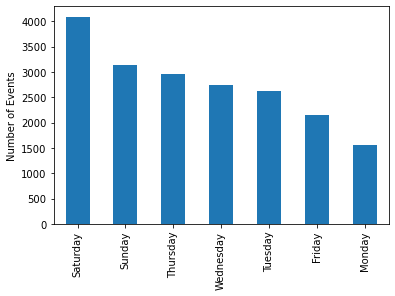

In [208]:
'''meta_events['day_of_week'].value_counts().plot(kind='bar',\
                                               order = ['Monday','Tuesday','Wednesday','Thursday','Friday',\
                                                       'Saturday','Sunday'])'''
'''sns.boxplot(x=meta_events['day_of_week'],y=pd.value_counts(meta_events['day_of_week'])['values'],\
             order=['Monday','Tuesday','Wednesday','Thursday','Friday',\
                                                       'Saturday','Sunday'])'''

#sns.barplot(x=meta_events['day_of_week'],y=meta_events['day_of_week'].value_counts())

meta_events['day_of_week'].value_counts().plot.bar(ylabel='Number of Events')

In [207]:
meta_events.plot.bar(ylab)

array(['Saturday', 'Sunday', 'Tuesday', 'Wednesday', 'Thursday', 'Monday',
       'Friday'], dtype=object)

<AxesSubplot:ylabel='Number of Events'>

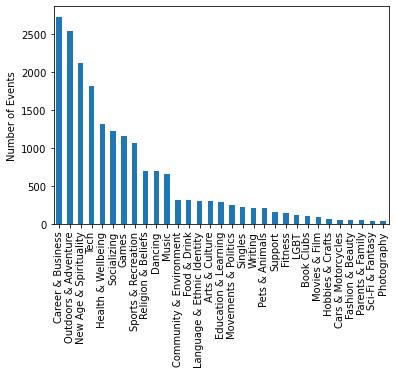

In [210]:
meta_events_t['category_name'].value_counts().plot(kind='bar', ylabel='Number of Events')

<AxesSubplot:ylabel='Number of Events'>

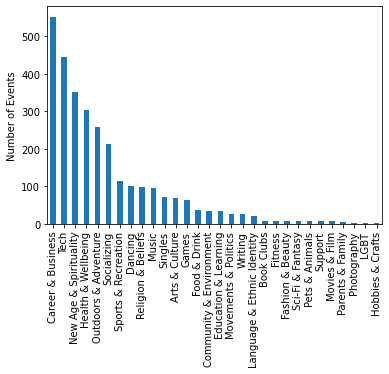

In [226]:
meta_events_t.loc[meta_events_t['day_of_week']=='Thursday']['category_name']\
.value_counts().plot(kind='bar', ylabel='Number of Events')

In [227]:
meta_groups_i=meta_groups.loc[meta_groups['first_event']<(max(meta_events['time_ts']).round('d')-pd.DateOffset(months=12))]

In [228]:
meta_groups_i.head()

,group_id,group_name,num_members,category_id,category_name,organizer_id,group_urlname,avg_rsvps,first_event,num_events
1,19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance,16.575000,2016-06-11 23:30:00,200
3,10016242,NashJS,1975,34,Tech,8111102,nashjs,81.782609,2015-11-12 00:00:00,23
5,11077852,Sunday Assembly Nashville,918,28,Religion & Beliefs,4765912,Sunday-Assembly-Nashville,15.410000,2015-11-14 23:00:00,200
7,1585196,Tennessee Hiking Group,4828,23,Outdoors & Adventure,13537265,TennesseeHikingGroup,7.180000,2016-06-22 23:30:00,200
10,18243826,Middle TN 40+ singles,2583,30,Singles,198309808,MTN-40,10.515152,2016-03-09 00:45:00,200


In [230]:
group_event_merged = meta_groups_i.merge(meta_events_t.loc\
                    [meta_events_t['time_ts']>=(max(meta_events['time_ts']).round('d')-pd.DateOffset(months=12))],\
                   how='left', on='group_id')

In [233]:
group_event_merged.shape

(7894, 16)

In [234]:
meta_groups_i = meta_groups_i.merge(group_event_merged.groupby('group_id')['event_id']\
                                    .size().reset_index(name='num_events_target_period'),how='left',on='group_id')

In [235]:
meta_groups_i.head()

,group_id,group_name,num_members,category_id,category_name,organizer_id,group_urlname,avg_rsvps,first_event,num_events,num_events_target_period
0,19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance,16.575000,2016-06-11 23:30:00,200,139
1,10016242,NashJS,1975,34,Tech,8111102,nashjs,81.782609,2015-11-12 00:00:00,23,11
2,11077852,Sunday Assembly Nashville,918,28,Religion & Beliefs,4765912,Sunday-Assembly-Nashville,15.410000,2015-11-14 23:00:00,200,120
3,1585196,Tennessee Hiking Group,4828,23,Outdoors & Adventure,13537265,TennesseeHikingGroup,7.180000,2016-06-22 23:30:00,200,121
4,18243826,Middle TN 40+ singles,2583,30,Singles,198309808,MTN-40,10.515152,2016-03-09 00:45:00,200,126


<AxesSubplot:xlabel='num_events_target_period', ylabel='num_members'>

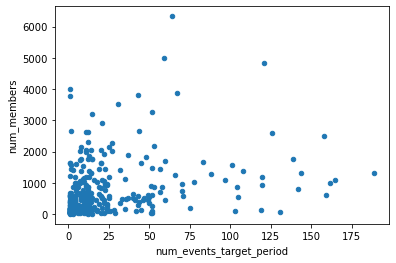

In [236]:
meta_groups_i.plot.scatter(x='num_events_target_period',y='num_members')

In [265]:
import plotly

from plotly.graph_objs import Scatter, Figure, Layout
plotly.offline.init_notebook_mode(connected = True)


data = [Scatter(x = meta_groups_i['num_events_target_period'], y = meta_groups_i['num_members'], \
                mode = 'markers',text=(meta_groups_i['group_name']+', '+meta_groups_i['category_name']))]#, text=df['movie_title'])]
axistemplate = dict(showgrid=False,zeroline=False,title='Number of Events')
axistemplatey = dict(showgrid=False,zeroline=False,title='Number of Members')
layout = Layout(title = "Number of Events vs Membership",xaxis=axistemplate,yaxis=axistemplatey)
 
fig = Figure(data = data, layout = layout)

plotly.offline.iplot(fig, show_link = False)

In [243]:
#fiteventstomembers2 = np.polyfit(x=meta_groups_i['num_events_target_period'],y=meta_groups_i['num_members'],deg=2)
#foffiteventstomembers2 = np.poly(fiteventstomembers2)

AttributeError: module 'numpy' has no attribute 'poly2d'

In [247]:
np.polyval(fiteventstomembers2, 50)

1176.0063157954469